# AnTeDe Word Embeddings Lab - Part B

## Session goal

The goal of this session is an introduction to the gensim interface for using word embeddings.

## Credits
This notebook has been adapted based on [a Stanford CS224n notebook](http://web.stanford.edu/class/cs224n/materials/Gensim.zip). Fabian Märki wrote the original adaptation for AnTeDe 2020.


In [3]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

import os
import io
import numpy as np

if IN_COLAB:
  %matplotlib inline
  from google.colab import files
else:
  # Get the interactive Tools for Matplotlib
  %matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

import gensim.downloader as api
import warnings
warnings.filterwarnings("ignore") 

Lets download the model using gensim's downloader api. Here we use GloVe emeddings since they are smaller and thus faster to download. 

In [4]:
model = api.load('glove-wiki-gigaword-50')

# alternative embeddings you might want to use:
# - word2vec-google-news-300 (will take a while to download)
# - glove-twitter-100 [25, 50, 100, 200] 
# - glove-wiki-gigaword-100 [50, 100, 200, 300] 
 
# see: https://radimrehurek.com/gensim/downloader.html

Before we start with the assigment, let's have some fun with some specific examples.

In [5]:
model.most_similar('obama')

[('barack', 0.9674171805381775),
 ('bush', 0.9642481207847595),
 ('clinton', 0.9606046080589294),
 ('mccain', 0.912293553352356),
 ('dole', 0.8878743052482605),
 ('gore', 0.8848039507865906),
 ('hillary', 0.8776552081108093),
 ('rodham', 0.8401790857315063),
 ('kerry', 0.8261427879333496),
 ('biden', 0.8095825910568237)]

In [6]:
model.most_similar('thatcher')

[('margaret', 0.6940129995346069),
 ('blair', 0.677729606628418),
 ('mugabe', 0.6729540228843689),
 ('predecessor', 0.6394892334938049),
 ('tory', 0.6350175738334656),
 ('sarkozy', 0.6347798109054565),
 ('mrs', 0.6171160936355591),
 ('balladur', 0.6149705648422241),
 ('deposed', 0.6095705032348633),
 ('prime', 0.6077988147735596)]

In [7]:
model.most_similar('biden')

[('gephardt', 0.8401313424110413),
 ('cheney', 0.8309441208839417),
 ('rodham', 0.8121967911720276),
 ('pelosi', 0.8114650249481201),
 ('obama', 0.8095825910568237),
 ('barack', 0.8082159757614136),
 ('dole', 0.8043028116226196),
 ('lieberman', 0.8020787835121155),
 ('hillary', 0.7988162040710449),
 ('senator', 0.7986924648284912)]

In [8]:
model.most_similar('trump')

[('casino', 0.6813157200813293),
 ('nows', 0.6659913659095764),
 ('casinos', 0.6434264779090881),
 ('hilton', 0.6420213580131531),
 ('mogul', 0.6340300440788269),
 ('vegas', 0.617143452167511),
 ('itt', 0.5946385264396667),
 ('westin', 0.5835393071174622),
 ('hyatt', 0.5815166234970093),
 ('diller', 0.5665310025215149)]

It seems that embeddings age quickly (or politicians rise faster than embeddings can keep up). Depending on your use case you may need to re-train your own.

In [9]:
model.most_similar('banana')

[('bananas', 0.8152028322219849),
 ('coconut', 0.7872510552406311),
 ('pineapple', 0.757981538772583),
 ('mango', 0.7556401491165161),
 ('beet', 0.7212650179862976),
 ('fruit', 0.7181406617164612),
 ('sugar', 0.7180197834968567),
 ('growers', 0.7165752053260803),
 ('peanut', 0.7018108367919922),
 ('cranberry', 0.6957995295524597)]

Another nice test is to give a bunch of words to the model and ask the model to find the one that doesn't belong.

In [10]:
model.doesnt_match("plane sky wings pilot feather".split())

'feather'

In [11]:
model.doesnt_match("sweden switzerland italy canada france poland hungary malta".split())

'canada'

In [12]:
model.doesnt_match("president reagan bush clinton obama trump biden".split())

'trump'

GloVe is great at analogies: 'man' is to 'king' as 'woman' is to '?'. 

In [13]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.8524


Lets put this into a analogy function

In [14]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

Does anybody have preconception? Lets see: Germany is to beer like France to ?

In [15]:
analogy('germany', 'beer', 'france')

'champagne'

In [16]:
analogy('australia','australian','switzerland')

'swiss'

In [17]:
analogy('australia','sydney','switzerland')

'zurich'

In [18]:
analogy('australia','canberra','switzerland')

'bern'

In [19]:
analogy('france','paris','switzerland')

'zurich'

Is this what you would expected? Why not Bern?

In [20]:
analogy('austria','vienna','switzerland')

'amsterdam'

As you see, it doesn't always work!

Understanding the data is often key for model improvements. Visualizations can greatly facilitate this understanding.

<font color='red'>Optional: Try other dimensionality reduction methods (e.g. [UMAP](https://umap-learn.readthedocs.io/en/latest/basic_usage.html) instead of PCA in display_scatterplot).</font> 

In [21]:
def get_word_vectors(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    return (words, np.array([model[w] for w in words]))


def display_scatterplot(words_and_word_vectors):   
    twodim = PCA().fit_transform(words_and_word_vectors[1])[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words_and_word_vectors[0], twodim):
        plt.text(x+0.05, y+0.05, word)

<IPython.core.display.Javascript object>


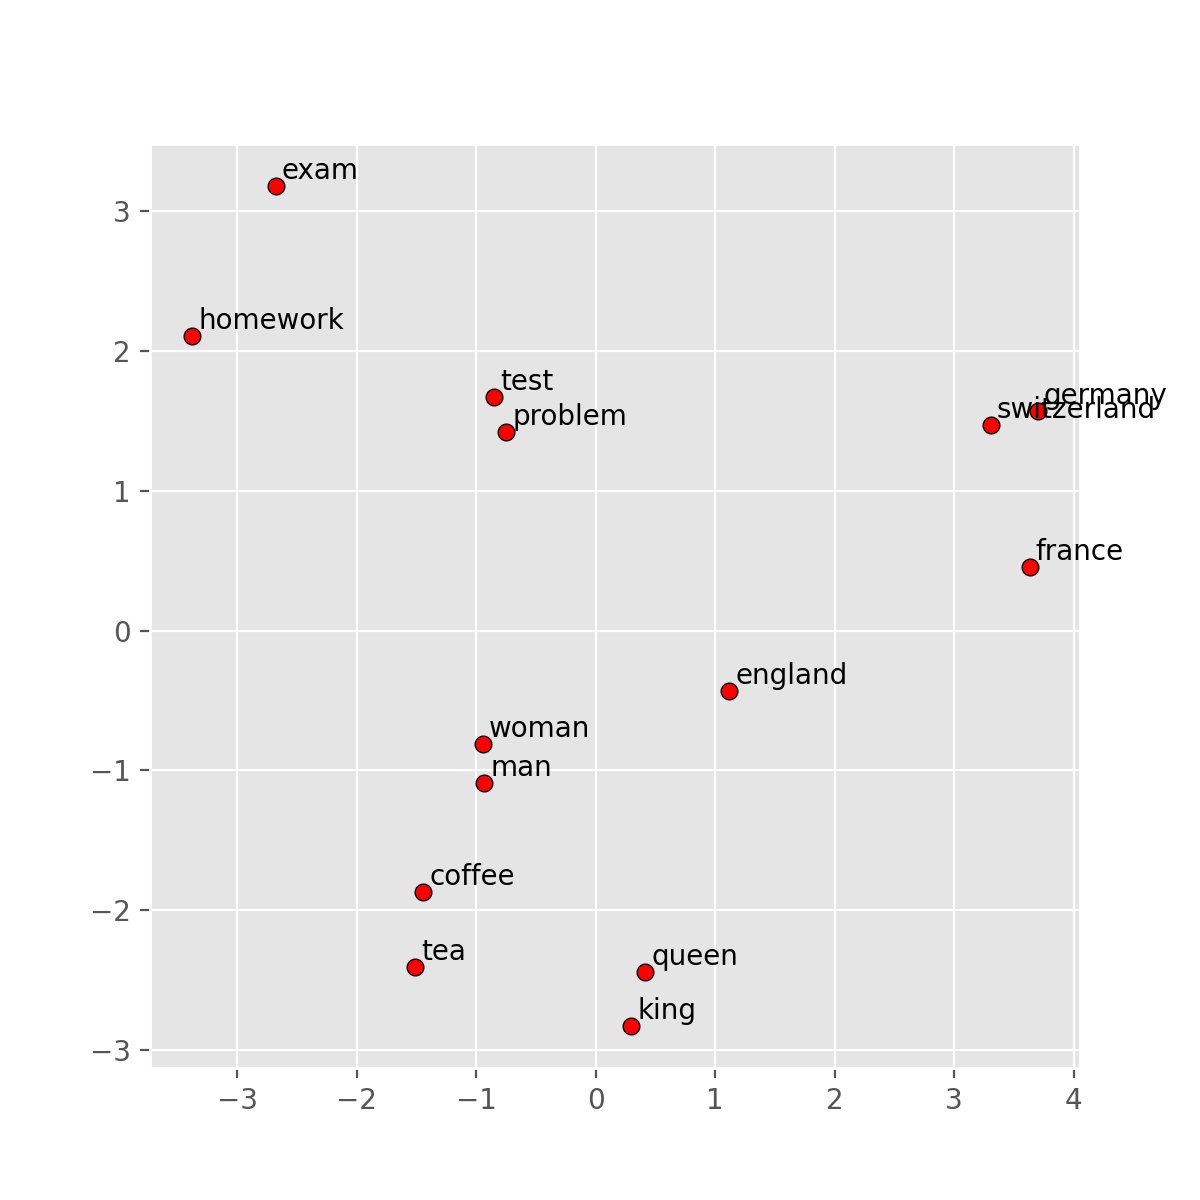

In [22]:
word_vectors = get_word_vectors(model, 
                        [ 'france', 'germany',  'switzerland','king','queen','man','woman', 'england', 'coffee', 
                        'homework', 'problem', 'exam', 'test', 'tea'])
display_scatterplot(word_vectors)

We can also get the embeddings values for a vector

In [23]:
model.word_vec("king")

array([ 0.50451 ,  0.68607 , -0.59517 , -0.022801,  0.60046 , -0.13498 ,
       -0.08813 ,  0.47377 , -0.61798 , -0.31012 , -0.076666,  1.493   ,
       -0.034189, -0.98173 ,  0.68229 ,  0.81722 , -0.51874 , -0.31503 ,
       -0.55809 ,  0.66421 ,  0.1961  , -0.13495 , -0.11476 , -0.30344 ,
        0.41177 , -2.223   , -1.0756  , -1.0783  , -0.34354 ,  0.33505 ,
        1.9927  , -0.04234 , -0.64319 ,  0.71125 ,  0.49159 ,  0.16754 ,
        0.34344 , -0.25663 , -0.8523  ,  0.1661  ,  0.40102 ,  1.1685  ,
       -1.0137  , -0.21585 , -0.15155 ,  0.78321 , -0.91241 , -1.6106  ,
       -0.64426 , -0.51042 ], dtype=float32)

The [Embedding Projector](https://projector.tensorflow.org) can come in quite handy to visualize vector spaces and helps to understand the data.

You may wish to save the word vectors and import them to [Embedding Projector](https://projector.tensorflow.org).

In [24]:
def save_vectors(words_and_word_vectors):
    np.savetxt("vecs.tsv", words_and_word_vectors[1], delimiter='\t')

    out_m = io.open('meta.tsv', 'w', encoding='utf-8')
    for word in words_and_word_vectors[0]:
        out_m.write(str(word) + "\n")
    out_m.close()
    
    if IN_COLAB:
      files.download('vecs.tsv')
      files.download('meta.tsv')

In [25]:
save_vectors(word_vectors)